In [1]:
import  numpy as np
X = np.load("X2.npy")
y = np.load("y2.npy")

/data1/tool/anaconda3/envs/tsai/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


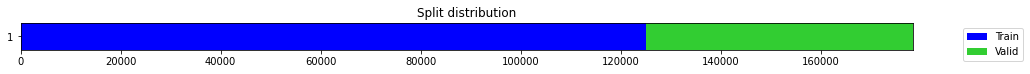

In [2]:
from tsai.all import *

splits = TimeSplitter(0.3)(y) 

 

In [4]:
X = X.reshape((-1,11*60))


In [5]:
x_train = X[splits[0]]
y_train = y[splits[0]]

x_test = X[splits[1]]
y_test = y[splits[1]]


In [6]:
from lightgbm.sklearn import LGBMClassifier
clf = LGBMClassifier()
# Train the LightGBM model on the training set
clf.fit(x_train, y_train)

LGBMClassifier()

In [7]:
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics


print('The accuracy of the LGBMClassifier  is:',metrics.accuracy_score(y_test,test_predict))
print('The recall of the LGBMClassifier  is:',metrics.recall_score(y_test,test_predict,average='macro'))

## Check Confusion Matrix (statistical matrix of predicted and true values for each scenario)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The accuracy of the LGBMClassifier  is: 0.938527039139528
The recall of the LGBMClassifier  is: 0.6885192487382122
The confusion matrix result:
 [[  733   333     9]
 [  501  2234   372]
 [    4  2073 47293]]


In [8]:
import pandas as pd

df = pd.read_csv("all_model_results.csv")
for i in range(df.shape[0]):
    if df['model'].values[i] == 'lgbm':
        df.loc[i,'acc'] = metrics.accuracy_score(y_test,test_predict)
        df.loc[i,'recall'] = metrics.recall_score(y_test,test_predict,average='macro')
        df.loc[i,'f1'] = metrics.f1_score(y_test,test_predict,average='macro')
        
df.to_csv("all_model_results.csv",index=False)